<a href="https://colab.research.google.com/github/chabhadia-nikhil/PRODIGY_ML_04/blob/main/hand_gesture_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
categories_path = "/content/drive/MyDrive/prodigy_ml_linearreg/images"
categories = os.listdir(categories_path)

Preprocessing data

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
training_generator = datagen.flow_from_directory(
    categories_path,
    target_size = (195,240),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    categories_path,
    target_size = (195,240),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4199 images belonging to 10 classes.
Found 1044 images belonging to 10 classes.


Training Model

In [ ]:
from keras import layers,models
def training_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(195, 240,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(len(training_generator.class_indices), activation='softmax'))

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
trained = training_model()
fitting = trained.fit(
    training_generator,
    epochs =10,
    validation_data=validation_generator
)

Epoch 1/10
132/132 [==============================] - 1878s 14s/step - loss: 1.0109 - accuracy: 0.6809 - val_loss: 0.7913 - val_accuracy: 0.7395
Epoch 2/10
132/132 [==============================] - 22s 165ms/step - loss: 0.1241 - accuracy: 0.9600 - val_loss: 0.5770 - val_accuracy: 0.8295
Epoch 3/10
132/132 [==============================] - 21s 159ms/step - loss: 0.0262 - accuracy: 0.9933 - val_loss: 0.6703 - val_accuracy: 0.8477
Epoch 4/10
132/132 [==============================] - 20s 154ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.6882 - val_accuracy: 0.8669
Epoch 5/10
132/132 [==============================] - 22s 163ms/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.7174 - val_accuracy: 0.8736
Epoch 6/10
132/132 [==============================] - 22s 167ms/step - loss: 3.9935e-04 - accuracy: 1.0000 - val_loss: 0.7510 - val_accuracy: 0.8707
Epoch 7/10
132/132 [==============================] - 22s 165ms/step - loss: 5.8981e-05 - accuracy: 1.0000 - val_loss: 0.7450 

In [ ]:
trained.save('hand_gesture_model')

Prediction

1/1 [==============================] - 0s 490ms/step
The predicted hand gesture is: okay


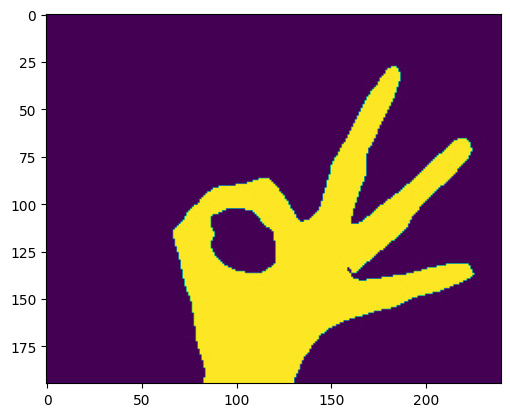

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

trained = tf.keras.models.load_model('hand_gesture_model')

img = cv2.imread('/content/drive/MyDrive/prodigy_ml_linearreg/images/okay/1084.jpg',1)

img=img/255
img = img.reshape(1,195,240,3)
prediction = trained.predict(img)
predicted_class = np.argmax(prediction)

class_labels = list(training_generator.class_indices.keys())
predicted_gesture = class_labels[predicted_class]

fig = plt.figure
img = plt.imread('/content/drive/MyDrive/prodigy_ml_linearreg/images/okay/1084.jpg')
plt.imshow(img)

print(f"The predicted hand gesture is: {predicted_gesture}")